# **PROPULSION DATASET :**


    

In [14]:
import pandas as pd
#load matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#oad skearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

C:\Users\Sheetal Davis\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
propulsion = pd.read_csv('propulsion.csv')
df=pd.DataFrame(propulsion)
df.head() #.head() prints the first five rows of the dataset.

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18,29760.552,2306.825,8780.012,246.011,246.011,776.921,288,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9,8375.774,1386.739,7051.621,60.318,60.318,589.764,288,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9,8377.589,1386.748,7098.469,60.339,60.339,570.651,288,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18,29761.091,2306.825,8782.024,246.021,246.021,769.855,288,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [5]:
#EXPLORATORY DATA ANALYSIS

In [ ]:
df.shape #.shape gives the the number of rows by number of columns value. 

(10000, 19)

In [ ]:
#This data set have 10000 rows and 19 columns

In [ ]:
df.columns # .columns give the name of all the columns in the data set 

Index(['Unnamed: 0', 'Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

In [ ]:
#.astype converts data with float datatype to category
df['GT Turbine decay state coefficient.']=df['GT Turbine decay state coefficient.'].astype('category')
df['GT Compressor decay state coefficient.']=df['GT Compressor decay state coefficient.'].astype('category')

In [ ]:
print (df.dtypes) #.dtypes give the data type of all columns in the data set.

Unnamed: 0                                          int64
Lever position (lp) [ ]                           float64
Ship speed (v) [knots]                              int64
Gas Turbine shaft torque (GTT) [kN m]             float64
Gas Turbine rate of revolutions (GTn) [rpm]       float64
Gas Generator rate of revolutions (GGn) [rpm]     float64
Starboard Propeller Torque (Ts) [kN]              float64
Port Propeller Torque (Tp) [kN]                   float64
HP Turbine exit temperature (T48) [C]             float64
GT Compressor inlet air temperature (T1) [C]        int64
GT Compressor outlet air temperature (T2) [C]     float64
HP Turbine exit pressure (P48) [bar]              float64
GT Compressor inlet air pressure (P1) [bar]       float64
GT Compressor outlet air pressure (P2) [bar]      float64
Gas Turbine exhaust gas pressure (Pexh) [bar]     float64
Turbine Injecton Control (TIC) [%]                float64
Fuel flow (mf) [kg/s]                             float64
GT Compressor 

In [ ]:
df.nunique(axis=0) #unique value in each attribute. 

Unnamed: 0                                       10000
Lever position (lp) [ ]                              9
Ship speed (v) [knots]                               9
Gas Turbine shaft torque (GTT) [kN m]             9634
Gas Turbine rate of revolutions (GTn) [rpm]       3422
Gas Generator rate of revolutions (GGn) [rpm]     9926
Starboard Propeller Torque (Ts) [kN]              3880
Port Propeller Torque (Tp) [kN]                   3880
HP Turbine exit temperature (T48) [C]             9890
GT Compressor inlet air temperature (T1) [C]         1
GT Compressor outlet air temperature (T2) [C]     9694
HP Turbine exit pressure (P48) [bar]               523
GT Compressor inlet air pressure (P1) [bar]          1
GT Compressor outlet air pressure (P2) [bar]      4000
Gas Turbine exhaust gas pressure (Pexh) [bar]       19
Turbine Injecton Control (TIC) [%]                7403
Fuel flow (mf) [kg/s]                              694
GT Compressor decay state coefficient.              51
GT Turbine

In [ ]:
df.describe() #Gives some description like the minimum, maximum, average etc values in each column.

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5.150075,14.951400,27100.647714,2131.151788,8194.182366,225.957785,225.957785,734.476178,288.0,645.748980,2.345732,9.980000e-01,12.262597,1.029402,33.480715,0.659100,0.975021,0.987455
std,2886.89568,2.624015,7.740467,22062.780307,772.211732,1090.569425,199.737886,199.737886,173.009157,0.0,72.483036,1.081038,2.236101e-13,5.320817,0.010353,25.721725,0.504791,0.014734,0.007510
min,0.00000,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,444.731000,288.0,540.999000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,2499.75000,3.144000,9.000000,8375.791500,1386.758000,7056.520500,60.317000,60.317000,589.841000,288.0,577.980750,1.389000,9.980000e-01,7.445000,1.020000,13.534000,0.246000,0.962000,0.981000
50%,4999.50000,5.140000,15.000000,21630.133500,1924.325000,8480.527000,175.264000,175.264000,705.351000,288.0,636.800000,2.082000,9.980000e-01,11.086000,1.026000,25.249500,0.496000,0.975000,0.987000
75%,7499.25000,7.148000,21.000000,39000.710250,2678.078000,9132.132500,332.360000,332.360000,833.154750,288.0,693.656750,2.981000,9.980000e-01,15.649000,1.036000,44.500000,0.881000,0.988000,0.994000
max,9999.00000,9.300000,27.000000,72783.338000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


In [ ]:
df=df.dropna(axis=0) #drops the rows which have missing values
df.shape

(10000, 19)

<AxesSubplot:>

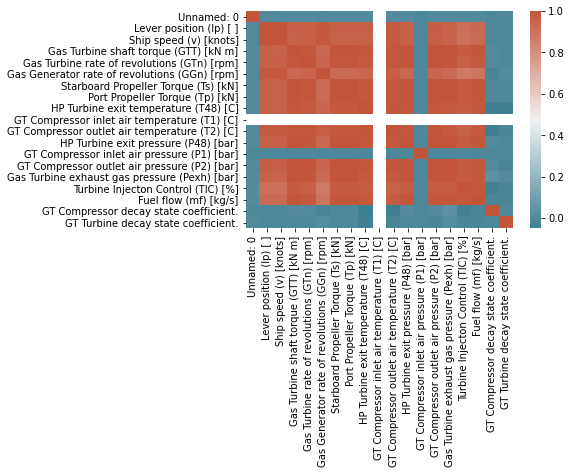

In [15]:
#This is heat map or correlation map to get a visual representaion of the relation between variables.
import seaborn as sns
cor=df.corr()
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns, cmap=sns.diverging_palette(220, 20, as_cmap=True))

From this map we can see that variables GT Compressor decay state coefficient and GT Turbine decay state coefficient are not highly correlated with the remaining variables. We find relevant feature by setting certain threshold in the below code.

In [ ]:
#Correlation with output variable
cor_target = abs(cor["GT Compressor decay state coefficient."])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.005
relevant_features

Gas Generator rate of revolutions (GGn) [rpm]    0.020852
HP Turbine exit temperature (T48) [C]            0.041719
GT Compressor outlet air temperature (T2) [C]    0.049096
HP Turbine exit pressure (P48) [bar]             0.006266
GT Compressor outlet air pressure (P2) [bar]     0.006488
Gas Turbine exhaust gas pressure (Pexh) [bar]    0.033397
Turbine Injecton Control (TIC) [%]               0.034149
Fuel flow (mf) [kg/s]                            0.015835
GT Compressor decay state coefficient.           1.000000
Name: GT Compressor decay state coefficient., dtype: float64

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X=df[['Gas Generator rate of revolutions (GGn) [rpm]', 'HP Turbine exit temperature (T48) [C]','GT Compressor outlet air temperature (T2) [C]','HP Turbine exit pressure (P48) [bar]','Gas Turbine exhaust gas pressure (Pexh) [bar]','Turbine Injecton Control (TIC) [%]']]
y=df['GT Compressor decay state coefficient.']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# creating instance of labelencoder and assigning categorical variables for the variable GT Compressor decay state coefficient.
labelencoder = LabelEncoder()
df['GT Compressor decay state coefficient.'] = labelencoder.fit_transform(df['GT Compressor decay state coefficient.'])


In [6]:
#RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred

array([24,  3, 36, ..., 21,  0,  9])

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.155


In [7]:
# SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.027333333333333334


In [8]:
#GRADIENT BOOSTING

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
X=df[['Gas Generator rate of revolutions (GGn) [rpm]', 'HP Turbine exit temperature (T48) [C]','GT Compressor outlet air temperature (T2) [C]','HP Turbine exit pressure (P48) [bar]','Gas Turbine exhaust gas pressure (Pexh) [bar]','Turbine Injecton Control (TIC) [%]']]
y=df['GT Compressor decay state coefficient.']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
GradientBoostingClassifier(random_state=0)
clf.score(X_test, y_test)

0.07233333333333333

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.030333333333333334


In [9]:
#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.017


The classifiers used in this study is random forest, adaboost, gradient decent and support vector machine. Random forest classifier shows highest accuracy compared to other model with an accuracy of 15.3%. The model accuracy has to be increased by increasing the size of dataset for better prediction. 